In [1]:
import cadquery as cq
import pyvista as pv

from microgen import Tpms, Rve, Phase, meshPeriodic
from microgen.remesh import remesh_keeping_periodicity_for_fem
from microgen.shape.surface_functions import gyroid

In [3]:
cell_size = 1.0
initial_gyroid = Tpms(surface_function=gyroid, density=0.3, cell_size=cell_size, resolution=30).generate(type_part="sheet")

cq.exporters.export(initial_gyroid, "initial_gyroid_cadquery.step")

INFO:root:computed offset = 0.922
INFO:root:
Generating surface (1/4)
INFO:root:
Generating shell surface

INFO:root:
Generating surface (2/4)
INFO:root:
Generating shell surface

INFO:root:
Generating surface (3/4)
INFO:root:
Generating shell surface

INFO:root:
Generating surface (4/4)
INFO:root:
Generating shell surface

INFO:root:TPMS density = 30.00%


In [4]:
rve = Rve(dim=cell_size, center=(0.0, 0.0, 0.0))
phase = [Phase(initial_gyroid)]
meshPeriodic(mesh_file="initial_gyroid_cadquery.step", rve=rve, listPhases=phase, size=0.06, order=1, output_file="initial_gyroid_cadquery.vtk")

Info    : Reading 'initial_gyroid_cadquery.vtk'...
Info    : Reading 12829 points
Info    : Reading 41370 cells
Info    : Done reading 'initial_gyroid_cadquery.vtk'


/home/ylegerstee/miniconda3/envs/belem-fem-offscreen/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


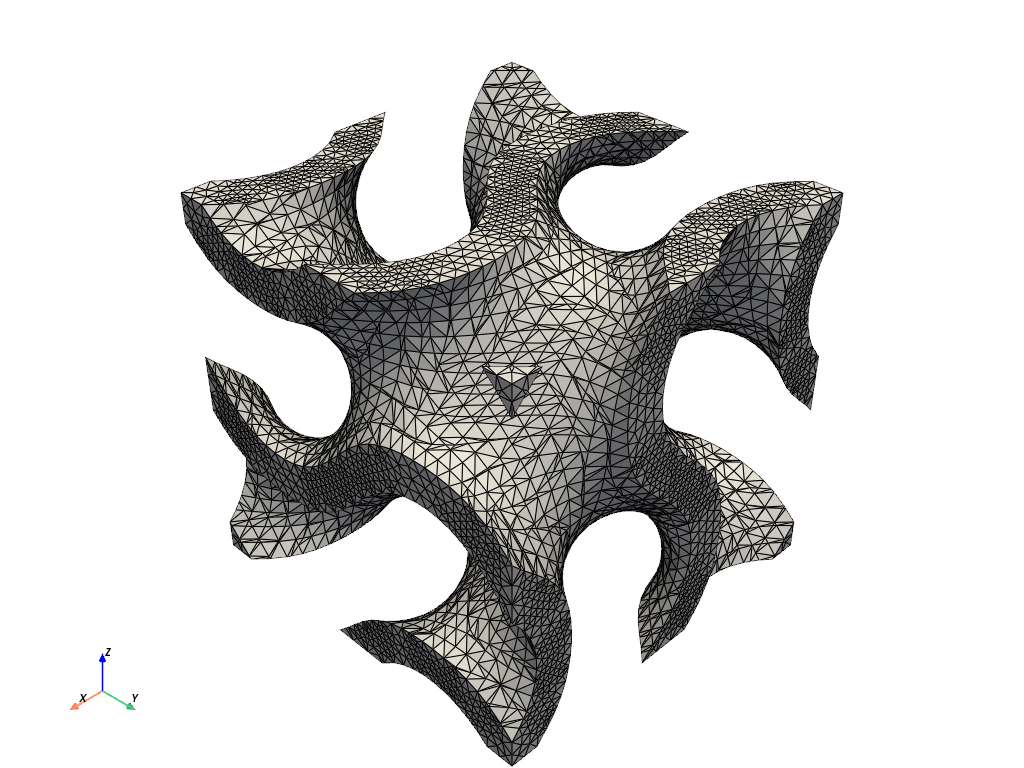

In [5]:
initial_mesh = pv.read("initial_gyroid_cadquery.vtk")
pv.start_xvfb()
initial_mesh.plot(color="white", show_edges=True, screenshot="initial_gyroid_cadquery.png")

/home/ylegerstee/miniconda3/envs/belem-fem-offscreen/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


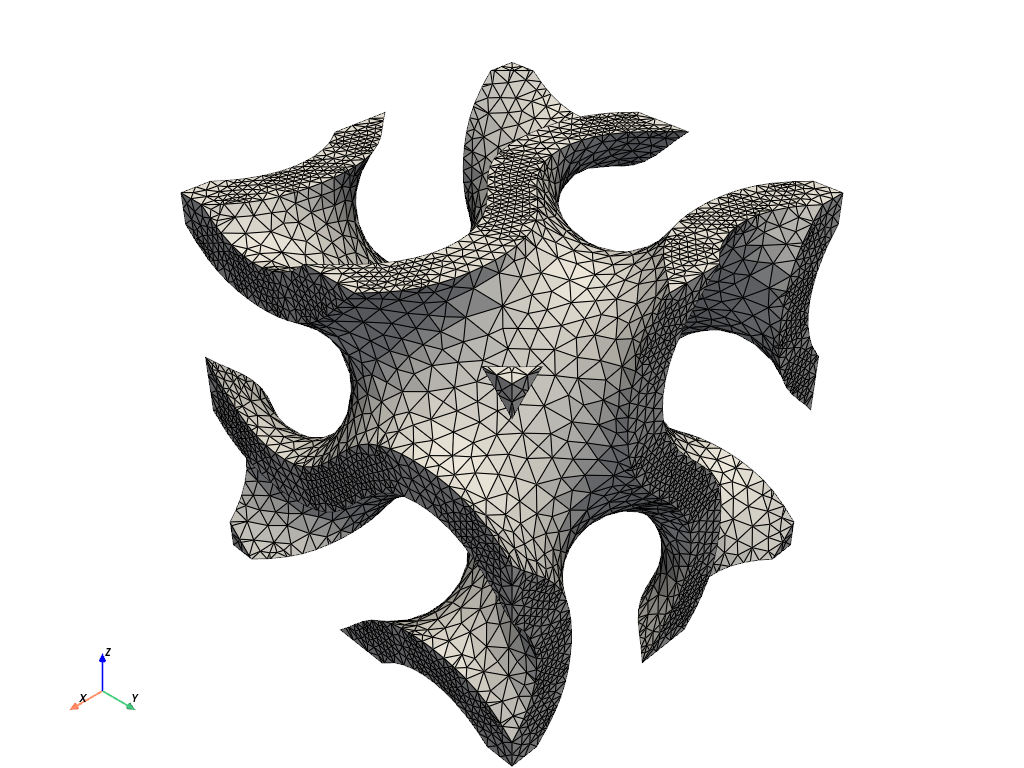

In [6]:
remeshed_gyroid = remesh_keeping_periodicity_for_fem(input_mesh=initial_mesh, hmax=0.05)
pv.start_xvfb()
remeshed_gyroid.plot(color="white", show_edges=True, screenshot="remeshed_gyroid_cadquery.png")